## Lesson 36: Multiple Regression

For this lesson we will be exploring multiple regression. This is a regression model with more than one predictor. Again, there are two, non-mutually exclusive, ideas about regression. The first is to use regression to understand the relationship between the predictors, also called features, inputs, or independent variables and the response, also called output, or dependent variable. For our model we will have only one response. In this capacity, we often are interested in inference. The second use of regression models is for prediction. Here we are only concerned with the predictive performance of the model and not the functional relationship between the inputs and the output.  This is how linear regression is considered a part of the machine learning ecology, as a supervised, model-based, batch learning method.   

Let's start by importing our packages and performing exploritory data analysis.

This notebook has been inspired from [Datacamp's](www.datacamp.com) Supervised Learning with scikit-learn course and the book Hands-On Machine Learning with Scikit-Learn & Tensorflow by Aurelien Geron.

### Import Packages
First we will import the usual packages

In [1]:
from datascience import *
import numpy as np
import pandas as pd
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)

Next we will import some new packages that you will start to learn. These include [scikit-learn](https://scikit-learn.org/stable/), [statsmodel](https://www.statsmodels.org/stable/index.html), and [seaborn](https://seaborn.pydata.org/). These should have been installed as part of the Anaconda distribution.

In [2]:
from sklearn import linear_model, datasets
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Motivation  

As future military officers and leaders, we need to appreciate our understanding and view of the world. Take the following test, http://forms.gapminder.org/s3/test-2018, without looking up answers, do it in earnest. Report your score in the next cell.

*I got 8/13, or 62%.*

### Data and EDA

In this notebook, you will be working with a subset of Gapminder data, see the [Gapminder](https://www.gapminder.org/) website for more information on this wonderful project by Hans Rosling and his team.  A subset of the data is provided to you in one CSV file called `gm_2008_region.csv`. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. This dataset has been heavily preprocessed to save you work.

Since the target variable, life expectancy, is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: `fertility`, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by `scikit-learn`. Then we will use `statsmodels` to get more detailed output. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's `.reshape()` method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with `scikit-learn` so it is useful to practice.

In [3]:
# Read the CSV file into a DataFrame: df
df = pd.read_csv('Data/gm_2008_region.csv')

# Create arrays for features and target variable
y = df['life']
X = df['fertility']

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.values.reshape(-1,1)
X = X.values.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


#### Exploring the Gapminder data

Start exploring the data using `pandas` methods such as `.info()`, `.describe()`, `.corr()`, and `.head()`.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [8]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [9]:
df.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


In [10]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Next let's look at some visual summaries of the data. The `pandas` package allows us to easily invoke the `matplotlib` to explore the data.

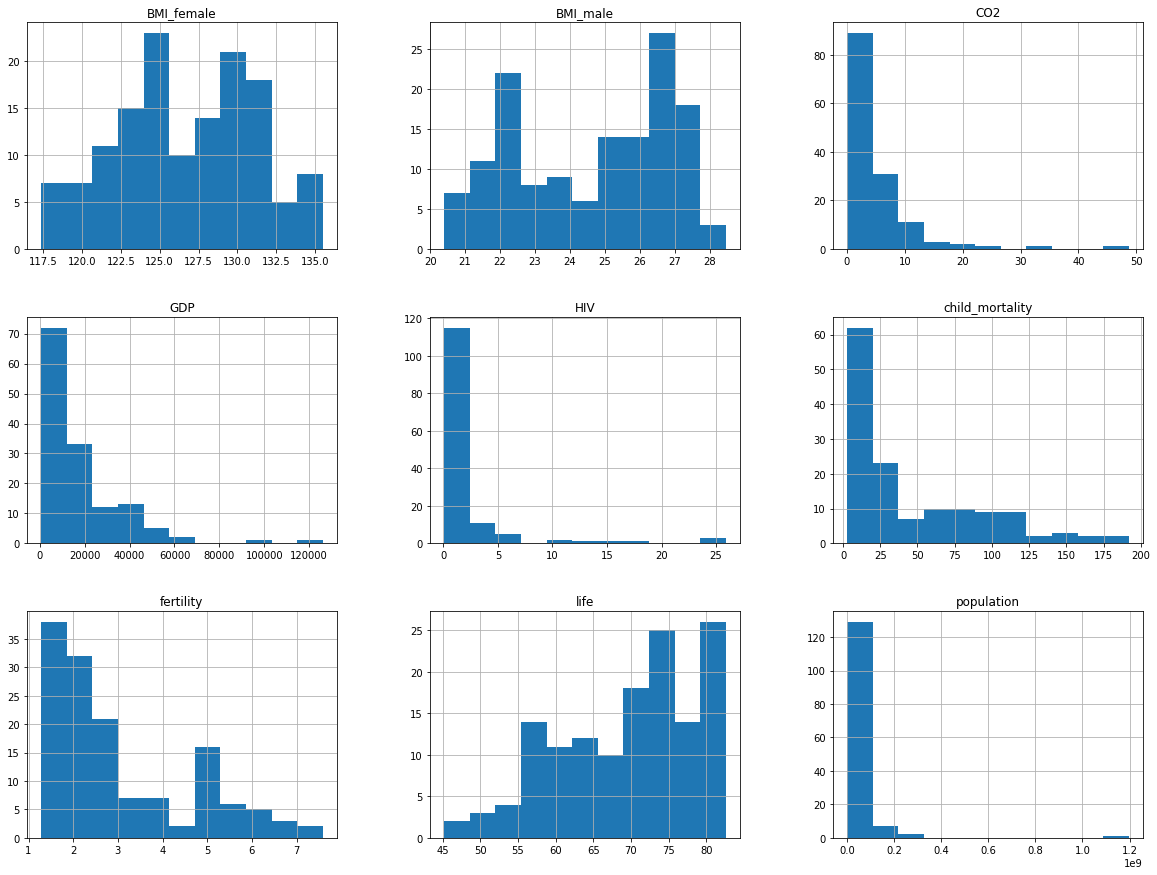

In [11]:
df.hist(bins=11,figsize=(20,15));

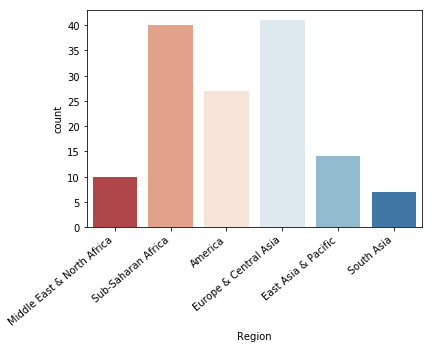

In [12]:
ax =sns.countplot(x='Region', data=df, palette='RdBu',orient="h")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

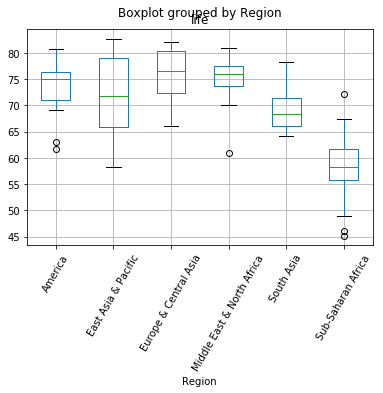

In [13]:
# Create a boxplot of life expectancy per region
df.boxplot('life','Region', rot=60);

In [14]:
from pandas.tools.plotting import scatter_matrix

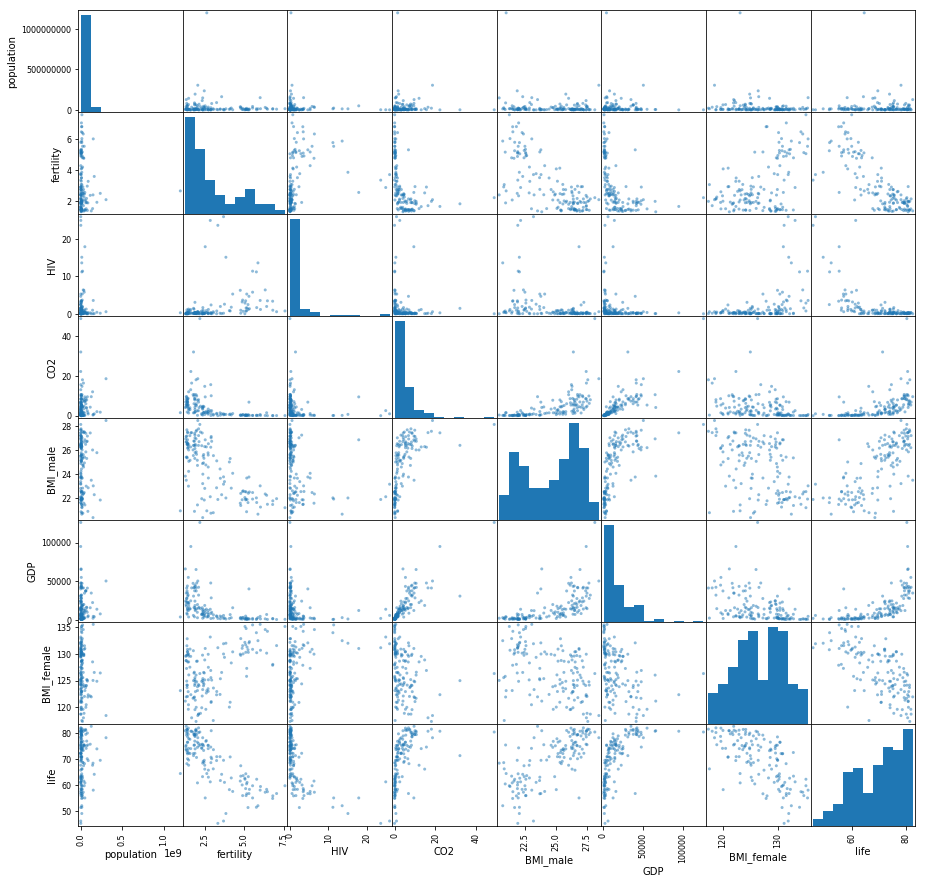

In [15]:
scatter_matrix(df[df.columns[:8]],figsize=(15,15));

Next, we will construct a heatmap showing the correlation between the different features of the Gapminder dataset. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

The heatmap can be generated using Seaborn's heatmap function and the following line of code, where `df.corr()` computes the pairwise correlation between columns:

`sns.heatmap(df.corr(), square=True, cmap='RdYlGn')`

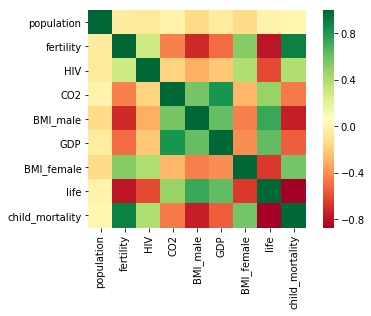

In [16]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn');

### Fit and Predict a Single Variable

Now, you will fit a linear regression and predict life expectancy using just one feature. In this exercise, you will use the `fertility` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `life`. 

First, create a scatter plot with `fertility` on the x-axis and `life` on the y-axis. As you will see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$ score using `sckit-learn`'s `.score()` method.

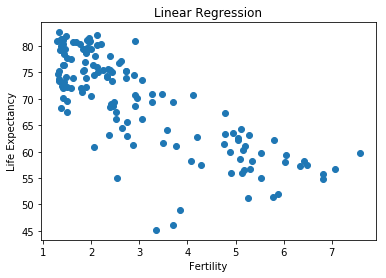

In [17]:
# Rename X so it makes more sense to us
X_fertility = X

plt.title('Linear Regression')
plt.scatter(X_fertility, y)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy');

To fit the model we need to create a `LinearRegression` instance from the `scikit-learn` package. This package has a consistent API, where from an instance we either create an estimator, a transform, or a predictor. To create an estimator, use the `.fit` method. See the [scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) help page for more information.

In [19]:
# Create the regressor: reg
reg = linear_model.LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Next we will predict the response for the `prediction_space` we created above and plot the result.

Text(0.5,1,'Linear Regression')

Text(0.5,0,'Fertility')

Text(0,0.5,'Life Expectancy')

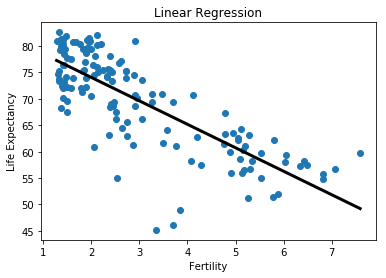

In [20]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Plot regression line
plt.title('Linear Regression')
plt.scatter(X_fertility, y)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

Let's get the coefficients and the $R^2$, the percent of variation in life expectancy explained by fertility.

In [21]:
print('Intercept: ',np.round(reg.intercept_[0],4))
print('Slope: ',np.round(reg.coef_[0][0],4))
# Print R^2 
print("\n")
print("The coefficeint of determination:", np.round(reg.score(X_fertility, y),4))

Intercept:  82.9572
Slope:  -4.4439


The coefficeint of determination: 0.6192


The `scikit-learn` package is designed for production model building and is not intuitive for generating models in an interactive manner. The `statsmodels` package is better for this. It also allows us to use the `R` formula notation. In this case the dependent variables are on the left of the tilde and the predictors on the right. Let's model life expectancy as a function of fertility.

In [22]:
# Fit regression model (using statsmodels)
results = smf.ols('life ~ fertility', data=df).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     222.8
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.62e-30
Time:                        09:56:40   Log-Likelihood:                -436.91
No. Observations:                 139   AIC:                             877.8
Df Residuals:                     137   BIC:                             883.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.9572      1.015     81.740      0.0

This output has a great deal of information. The assumptions for this model are that the errors are independently distributed from a normal distribution with mean zero and constant variance. This means the slope coefficient is normally distributed as well, thus we can generate $p$-values.

The $F$-statistic is simultaneously testing if all coefficients are zero:    

$$H_{o}: \beta_1 = \beta_2 = \dots = \beta_n = 0 $$  
$$H_{a}: \mbox{At least one coefficient not 0}$$


The $t$-test is testing a single coefficient.  
$$H_{o}: \beta_i = 0 $$  
$$H_{a}: \beta_i \neq 0$$


We can check the normality plot using a quantile-quantile plot. This plot has the quantiles from a normal distribution on one axis and the empirical quantiles on the other. If it is normal, the data will be approximately on a straight line.

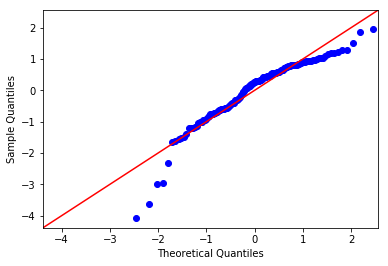

In [23]:
sm.qqplot(results.resid,fit=True,line="45");

The normality assumption is suspect. We may want to use a bootstrap method instead.

### Multiple Regression  

We will now add more variables to the model. We will first take the approach of inference and then prediction.

In [24]:
# Create model formula
"+".join(np.delete(df.columns,7))

'population+fertility+HIV+CO2+BMI_male+GDP+BMI_female+child_mortality+Region'

In [25]:
my_formula = "life~" +"+".join(np.delete(df.columns,7))
my_formula

'life~population+fertility+HIV+CO2+BMI_male+GDP+BMI_female+child_mortality+Region'

In [26]:
# Fit regression model (using statsmodels)
results2 = smf.ols(formula= my_formula , data=df).fit()

# Inspect the results
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     91.86
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           2.21e-57
Time:                        10:00:32   Log-Likelihood:                -340.25
No. Observations:                 139   AIC:                             708.5
Df Residuals:                     125   BIC:                             749.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Interpret the results. 

1. Why did the region get broken into 5 separate variables?
2. Why is $R^2$ and the $F$-statistic so significant, yet many individual $p$-values are not significant?
3. What is the predictive performance?

*1) The region data is not numerical, but categorical. Thus, to find the correlation between region and lifespan, the data must be split into one boolean variable for each category value, and each category correlated independently. Americal is not included since it is used as the default: all the other regions are compared to it.*

*2) The $R^2$ and the $F$-statistic are aggregate values for the whole dataset, thus they are influenced by the few individual $p$-values that are highly significant. Even though many of the individual predictors have almost no correlation to life expectancy, they do not detract from the combined prediction efficacy of the couple predictors that are strongly correlated.*

*3) The predictive performance is the reliability of predictions of life expectancy made using all the independent variables used.*

We can test subsets of the variables together using an F-test.

In [27]:
print(results2.f_test("Region[T.East Asia & Pacific] = Region[T.Europe & Central Asia] = Region[T.Middle East & North Africa]=Region[T.South Asia] = Region[T.Sub-Saharan Africa] = 0"))

<F test: F=array([[1.95827009]]), p=0.08941307410026779, df_denom=125, df_num=5>


In [28]:
print(results2.f_test("population = BMI_male = 0"))

<F test: F=array([[0.31533864]]), p=0.5754279304712107, df_denom=125, df_num=1>


C:\Users\C20Jefferson.Sesler\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


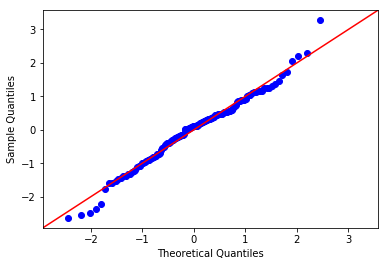

In [29]:
sm.qqplot(results2.resid,fit=True,line="45");

Run the model again, but drop region from the analysis.

In [30]:
np.delete(df.columns,[7,9])

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'],
      dtype='object')

In [31]:
my_formula2 = "life~" +"+".join(np.delete(df.columns,[7,9]))
my_formula2

'life~population+fertility+HIV+CO2+BMI_male+GDP+BMI_female+child_mortality'

In [32]:
# Fit regression model (using statsmodels)
results3 = smf.ols(formula= my_formula2 , data=df).fit()

# Inspect the results
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     142.8
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.48e-60
Time:                        10:12:53   Log-Likelihood:                -345.49
No. Observations:                 139   AIC:                             709.0
Df Residuals:                     130   BIC:                             735.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          98.2083     10.759     

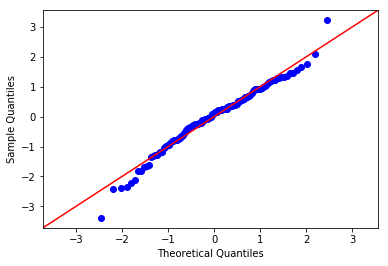

In [33]:
sm.qqplot(results3.resid,fit=True,line="45");

Continue adjusting the model. 

In [34]:
my_formula3 = "life~" +"+".join(np.delete(df.columns,[0,1,7,9]))
my_formula3

'life~HIV+CO2+BMI_male+GDP+BMI_female+child_mortality'

In [35]:
# Fit regression model (using statsmodels)
results4 = smf.ols(formula= my_formula3 , data=df).fit()

# Inspect the results
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                   life   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 27 Nov 2018   Prob (F-statistic):           1.69e-62
Time:                        10:13:10   Log-Likelihood:                -346.33
No. Observations:                 139   AIC:                             706.7
Df Residuals:                     132   BIC:                             727.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          95.4596     10.292     

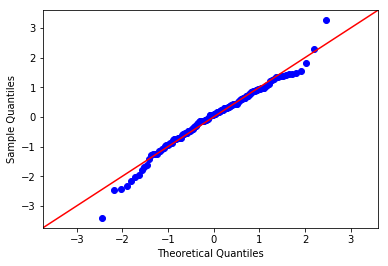

In [36]:
sm.qqplot(results4.resid,fit=True,line="45");

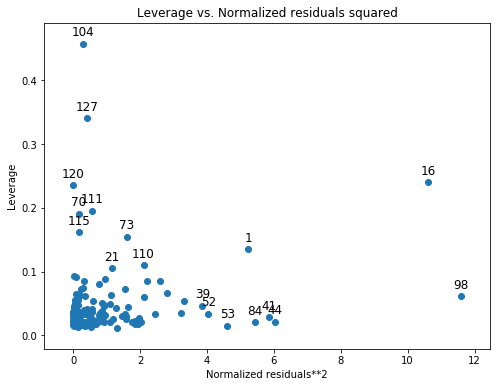

In [37]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results4, ax = ax)

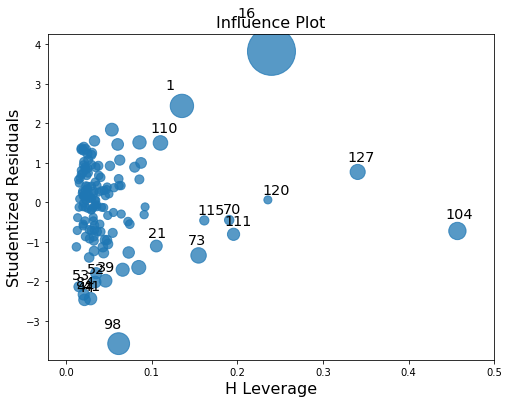

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(8,6))
fig = influence_plot(results4,ax=ax)

#### Creating dummy variables
`scikit-learn` does not accept non-numerical features. In `statsmodels` 'Region' was automatically taken care for us. We want to include 'Region' as it may contain features very useful in predicting life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the 'Region' feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.

In [39]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df,drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


#### Train/test split for regression
For a measure of prediction error it is best to use data that was not used in the building of the model. An easy first attempt is to break the data into train and test sets. This is vital to ensure that our supervised learning model is able to generalize well to new data. This is also true for classification models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the $R^2$ score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array `X` and target variable array `y` have been pre-loaded for you from the DataFrame `df`.

In [40]:
df_region.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,1,0,0,0,0


In [41]:
df_region.drop(columns=["life"]).head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0,0,1,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,0,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0,1,0,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,1,0,0,0,0


In [42]:
X=df_region.drop(columns=["life"])
X.shape

(139, 13)

In [43]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

R^2: 0.8219419939586013
Root Mean Squared Error: 3.4052481157349823
